<a href="https://colab.research.google.com/github/SamwelJane/Project-AUTOLIB-BLUECARS/blob/master/IP_AUTOLIB_BLUECARS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RESEARCH QUESTION

---
The Autolib electric car-sharing service company wants to investigate a claim about the blue cars from the provided Autolib dataset. How they are used and at what time they are used.

### Null Hypothesis:  
Postal code 75015 is the most popular  on weekend as compared to postal code 92000
## Alternative Hypothesis:
Postal code 75015 is not the most popular on weekend but rather postal code 92000 is the most popular.






## METRIC FOR SUCCESS


*   Being able to able to plot univariate ,Bivariate and multivate will be a measure of what we expected.


*   By selecting appropriate sampling technique that will help us get a sample that is not biased


*    WE shall also  conclude on whether to accept or fail to accept out null hypothesis if we get value after calculating the Z score and compare it with significance level




## THE CONTEXT
---

We have been tasked  with  dataset from Autolib company which is an electric car sharing service in Paris. Our main task is to investigate a claim about the blue cars from the provided Autolib dataset.

## EXPERIMENTAL DESIGNS

---
To work on this project, we will perform the following activistes to help us   determine the hypothesis







* Define the question, the metric for success, the context, experimental design taken and the appropriateness of the available data to answer the given question. 
*Find and deal with outliers, anomalies, and missing data within the dataset.

*   Plot appropriate univariate and bivariate summaries recording our observations.
*  Implement the solution by performing hypothesis testing.


*   Challenge our solution by providing insights on how we can make improvements.









## APPROPRIATENESS OF THE DATA

In [0]:
#Import libraries
#Reading the Data
# Importing Numpy
import numpy as np

# Importing Pandas
import pandas as pd

# Importing Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Importing Seaborn
import seaborn as sns
anomalies = []
import seaborn as sb
# importing linear regression from sci kit learn
from sklearn.linear_model import LinearRegression

from sklearn import model_selection

from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split

import statsmodels.api as sm
# importing random module
# we will use random.sample() function to return a k length 
# list of unique elements chosen from our population
import random

## Reading the dataset
Our dataset is in form of URl and so we shall first read our dataset by loading the The URL in this collab by using pandas which is stated as (pd)

## Checking Data
Here we get to explore more about the dataset such as shape of our dataset,head and tail,type of data type in the columns, whether we have null values in the data set.

In [5]:
# column definations, this can be obtained from this link
description=pd.read_csv('autolib_description.csv')
description

,Column name,explanation.
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


In [3]:
#loadinf abd previewing our dataset from  url
auto=pd.read_csv('http://bit.ly/DSCoreAutolibDataset')
auto.head(10)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
5,75001,1/6/2018,1437,5,weekend,187,185,6,6,7,8,38,35
6,75001,1/7/2018,1440,6,weekend,180,180,2,2,10,9,34,34
7,75001,1/8/2018,1438,0,weekday,84,83,3,3,10,10,14,15
8,75001,1/9/2018,1439,1,weekday,81,84,1,1,4,4,15,15
9,75001,1/10/2018,1440,2,weekday,88,85,5,5,11,11,23,22


In [6]:
#  calculating the number of variables based on weekend and weekaday
auto.groupby('day_type').day_type.count()

day_type
weekday    11544
weekend     4541
Name: day_type, dtype: int64

In [7]:
# Previewing the last five rows of the dataset
#
auto.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [8]:
# Determining the no. of records in our dataset
# in this code we want to fine the number of raws and the number of columns in our dataset.
# the dataset has 160854 raws and 13 columns.
auto.shape

(16085, 13)

In [9]:
# Checking the information of the dataset

#In this code we get to  have an exploration overview of the number of raws  depending on each column and the datatype they contain.

#
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
Postal code               16085 non-null int64
date                      16085 non-null object
n_daily_data_points       16085 non-null int64
dayOfWeek                 16085 non-null int64
day_type                  16085 non-null object
BlueCars_taken_sum        16085 non-null int64
BlueCars_returned_sum     16085 non-null int64
Utilib_taken_sum          16085 non-null int64
Utilib_returned_sum       16085 non-null int64
Utilib_14_taken_sum       16085 non-null int64
Utilib_14_returned_sum    16085 non-null int64
Slots_freed_sum           16085 non-null int64
Slots_taken_sum           16085 non-null int64
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [0]:
# Previewing some summary statistics of the dataset
#
auto.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


In [0]:
# checking sum of null missing values in each column
# the dataset has no missing values
auto.isnull().sum()

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

In [0]:
# checking the profile of our dataset
# We are curious to know a brief  summary  our dataset  and may not be limited  to:
#missing values in a column How are the features co-related? What is the max, min or Outlier in the data?
# what insights can we get one we  plot and Visualize this data and see the details.

#There are functions available in Pandas to get that insight like describe,info etc. 
#but those are pretty basics and with the help of Data Visualization tools like matplotlib, seaborne and plotly we can plot the visualization as well.


#Documentation Following Statistics is generated for each of the column:

#Essentials: type, unique values, missing values
#Quantile statistics like minimum value, Q1, median, Q3, maximum, range, interquartile range
#Descriptive statistics like mean, mode, standard deviation, sum, median absolute deviation, coefficient of variation, kurtosis, skewness
#Most frequent values Histogram
#Correlations highlighting of highly correlated variables, Spearman and Pearson matrixes

import pandas_profiling


pandas_profiling.ProfileReport(auto)

Number of variables,13
Number of observations,16085
Total Missing (%),0.0%
Total size in memory,1.6 MiB
Average record size in memory,104.0 B
Numeric,5
Categorical,2
Boolean,0
Date,0
Text (Unique),0
Rejected,6


In [0]:
# check  for uniques values in each columns
print(auto['day_type'].unique())

['weekday' 'weekend']


## Tidying the dataset
Tidy data is a standard way of mapping the meaning of a dataset to its structure.

In this section we purpose to  check for outliers, drop unnessecary columns, convert index to  datetime indexing




In [0]:
# converting column names  to have a uniforminity by changing them to lower case
auto.columns = auto.columns.str.lower().str.replace(' ', '_')

In [8]:
auto.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

In [9]:
# Drop columns
# the reason for dropping this columns is because they don't conntribute a lot towards  conclusion of accepting or rejecting our null hypothesis 
auto.drop(columns=['utilib_taken_sum','utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum'],inplace=True)
auto.head(2)


,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,23,22


AxesSubplot(0.125,0.125;0.775x0.755)


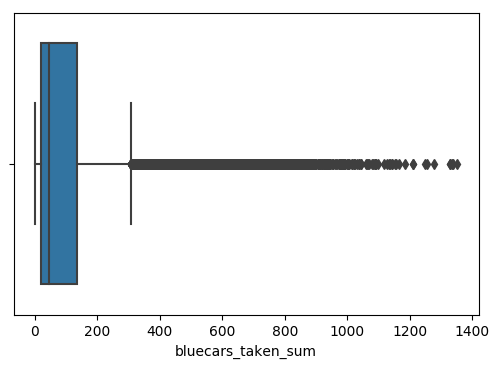

In [10]:
 #Checking for the outliers

plt.figure(dpi=100)
print(sns.boxplot(auto['bluecars_taken_sum']))           

#Number of bluecars taken that date in that area were sparesely  spread from the mean, 
#but according to our research question I don't think dropping the would be a wise decision  because  they respesent that there was a higher
#number of blues casrs that werer returned 


AxesSubplot(0.125,0.125;0.775x0.755)


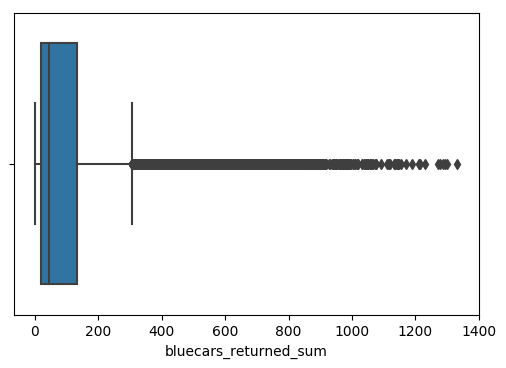

In [21]:

plt.figure(dpi=100)
print(sns.boxplot(auto['bluecars_returned_sum']))           

# Sampling Technique

---

Before   taking a step hurther to test our hypothesis and decide whether to reject it or not accept it, we will perform sampling since we don't need to work with the whole popuplation.
Before choosing the best sampling technique we need to understand  the sample that can is consistent,Diverse and has transpiracy of the whole data.

## Random Sampling

---

Since we have  created a new dataframe called auto1 that has only one dependent variable which is weekend,Random sampling would be the best  method to apply compare to stratified  sampling.
We shall select 1000 rows auto of 4541 rows


In [51]:
# creating   a dataframe thas only weekends since we are interested with the weekend in order to test our hypothsis
auto1=auto[auto.day_type  == 'weekend']
auto1.head()

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
5,75001,1/6/2018,1437,5,weekend,187,185,38,35
6,75001,1/7/2018,1440,6,weekend,180,180,34,34
12,75001,1/13/2018,1440,5,weekend,224,223,38,38
13,75001,1/14/2018,1440,6,weekend,193,193,22,20
19,75001,1/20/2018,1439,5,weekend,217,217,41,39


In [56]:
#checkin the shape of  out new dataframe
auto1.shape

(4541, 9)

In [52]:
# random sampling of 1000 rows from the whole dataframe
auto1_sample=auto1.sample(n = 1000, replace="False")

print('Random sample of 1000 rows',auto1_sample.head())

Random sample of 1000 rows        postal_code       date  ...  slots_freed_sum  slots_taken_sum
14633        94300  4/21/2018  ...                0                0
1912         75013  2/10/2018  ...              196              194
11652        93360   1/6/2018  ...                0                0
7505         92310  1/21/2018  ...                0                0
11622        93350  5/26/2018  ...                2                2

[5 rows x 9 columns]


In [54]:
auto1_sample.shape

(1000, 9)

## Exploratory Data Analysis:

---

## Univariate Analysis

---

It is section will we get to explore about one variable at a time . Here we get to calculate the central tendacy ,Measures of Dispersion/Variability/Spread e.g standard deviation ,corelation and kurtosis.,We aslo do Visualisation Techniques by using pie charts, and histogram

## Measures of Central Tendency

---

Doing central Tendency helps us to get  to know the mean number of bluecars , the rate at which they were taken, and the most  the most hour they were taken. 

mean

In [60]:
# checking for the mean
print('mean of bluecars taken',auto1_sample['bluecars_taken_sum'].mean())
print('mean of bluecars returned',auto1_sample['bluecars_returned_sum'].mean())
# the first mean shows that the  total number of bluecars that were taken were roughly 126
# while  the  same rate  at which the bluecars were taken is the  same rate at which they were returned

mean of bluecars taken 150.96
mean of bluecars returned 151.121


mode

In [61]:
# checking for the mode
print('mode of bluecars taken',auto1_sample['bluecars_taken_sum'].mode())
print('mode of bluecars returned',auto['bluecars_returned_sum'].mode())
 # The figure demonstrate that it is  the number of bluecars which were taken at agiven time were 12 while the second values shows that
  #the  mode freguency at which the bluecars were returned were 13

mode of bluecars taken 0    53
dtype: int64
mode of bluecars returned 0    13
dtype: int64


median

In [63]:
# checking for median
print('median of bluecars taken',auto1_sample['bluecars_taken_sum'].median())
print('median of bluecars taken',auto1_sample['bluecars_returned_sum'].median())
 

median of bluecars taken 55.5
median of bluecars taken 56.0


## Measures of Dispersion/Variability/Spread

Quantiles

In [64]:
# In statistics and probability, quartiles are values that divide your data into quarters provided data is sorted in an ascending order. 
# There are three quartile values. First quartile value is at 25 percentile. 
# Second quartile is 50 percentile and third quartile is 75 percentile. 
# Second quartile (Q2) is median of the whole data. First quartile (Q1) is median of upper half of the data. 
# And Third Quartile (Q3) is median of lower half of the data.
# ---
print(auto1_sample['bluecars_taken_sum'].quantile([0.25,0.5,0.75]))
print(auto1_sample['bluecars_returned_sum'].quantile([0.25,0.5,0.75]))
print(auto1_sample['n_daily_data_points'].quantile([0.25,0.5,0.75]))

0.25     24.00
0.50     55.50
0.75    158.25
Name: bluecars_taken_sum, dtype: float64
0.25     24.00
0.50     56.00
0.75    158.25
Name: bluecars_returned_sum, dtype: float64
0.25    1440.0
0.50    1440.0
0.75    1440.0
Name: n_daily_data_points, dtype: float64


Range

In [66]:
# calculating the range between the maximum number of bluecars that were taken and the minimum  number of bluecars that were taken per area 
(auto1['bluecars_taken_sum'].max()) - (auto1['bluecars_taken_sum'].min())
             

1352

Skewness


---


 
 








*   In Skewness  we are interested to  measure  the asymmetry of the probability distribution of our data
*  we expect our skwness  value to be either  a positive or negative, or undefined.


*   If we get that distribution is skewed to the left, the tail on the curve’s left-hand side is longer than the tail on the right-hand side,it will  mean that mean is less than the mode. This situation is also called negative skewness 

* If our distribution is skewed to the right, the tail on the curve’s right-hand side is longer than the tail on the left-hand side, 
This   
 








In [67]:
# checking for skewness 
print('skewness of bluecars',auto1['bluecars_taken_sum'].skew())
print('skewness of data_point',auto1['n_daily_data_points'].skew())
# the  distribution of bluecars taken  is  oositively skewed  with a skewness value 2.406.
#This mean that the  mean is spaced from the mode  by a posive vale of 2.40635

# The number distribution curve of number of daily daya point is negatively skewed witha value of -5.74277,
#This means that the mean of the data point is negatively skewed,e.i  the mean  is less than the mode and the median

skewness of bluecars 2.3007208190452824
skewness of data_point -4.53311740557901


## Kurtosis

---

Kurtosis is a statistical measure that defines how heavily the tails of a distribution differ from the tails of a normal distribution. 

In [68]:
# checking for kurtosis
print('Kurtosis of bluecars taken',auto1['bluecars_taken_sum'].kurt())
print('Kurtosid of data_point',auto1['n_daily_data_points'].kurt())
# in the first  and the second values we  got positive values,this is called Leptokurtic,this type of kurtosis indicates a positive excess kurtosis distribution from normal one

Kurtosis of bluecars taken 5.295039714140337
Kurtosid of data_point 20.764613726182784


## Univariate Visualisation Techniques

---

BAR GRAPHS

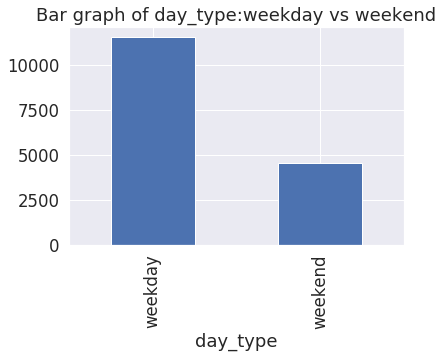

In [70]:

sns.set_style('darkgrid')
auto.groupby('day_type')['day_type'].count().plot(kind='bar')
plt.title('Bar graph of day_type:weekday vs weekend')
plt.show()
# the bar graph represent that the number of bluecars which were taken on on weekday were almost thrice the number of bluecars which were taken on weekend

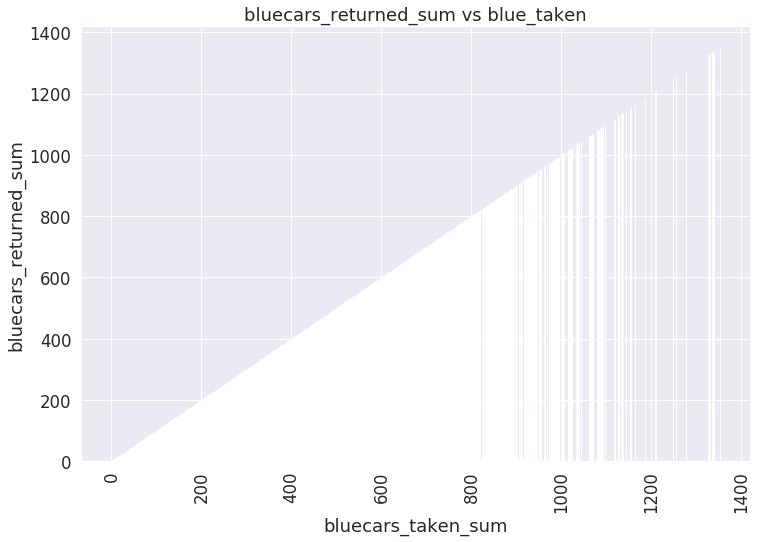

In [145]:
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(auto.bluecars_taken_sum, auto.bluecars_taken_sum, color='blue')
plt.xticks(rotation=90)
ax.set_xlabel('bluecars_taken_sum')
ax.set_ylabel('bluecars_returned_sum')
plt.title('bluecars_returned_sum vs blue_taken')
plt.show()
# the bar graph  shows that as the Number of bluecars taken that date in that area increases the 
#Number of bluecars returned that date in that area also increases.

Histograms

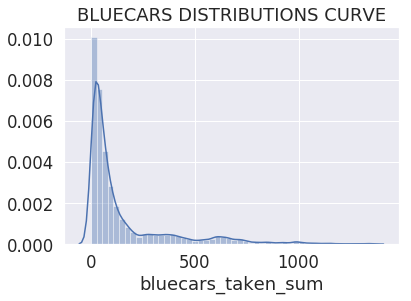

In [73]:
sns.distplot(auto1.bluecars_taken_sum, kde = True)
plt.title('BLUECARS DISTRIBUTIONS CURVE')
plt.show()
# based on the distribution curve that we plotted we can say that the curve is positively skewed
# It is between the range of 0 to 150 that we have a high number of cars that were taken comapred to other range bracket.
#  Under this range 0- 150 we have more  variables that are distributed away from the mean , this can be demonstarted by the shapeness of the curve.


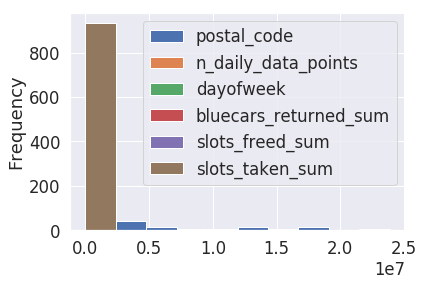

In [75]:
auto.groupby('bluecars_taken_sum').sum().plot(kind='hist')
#plt.title('freguency of variables in each column')
#plt.title("freguency of variables in each column")

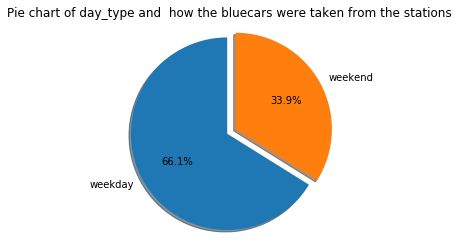

In [14]:
df=auto.groupby('day_type').bluecars_taken_sum.sum()
explode=[0,0.1,]
label=['weekday','weekend']
plt.pie(df, explode=explode, labels=label ,autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.axis('equal')
plt.title('Pie chart of day_type and  how the bluecars were taken from the stations ')
plt.show() 
#From the pie we can deduce that the number of bluecars which were taken on  weekend represented 33.9% the total number of bluecars while 66.1% on weekday

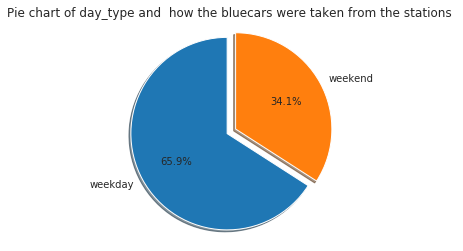

In [0]:
dd=auto.groupby('day_type').bluecars_returned_sum.sum()
explode = [0,0.1,]
label=['weekday','weekend']
plt.pie(dd, explode=explode, labels=label ,autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.axis('equal')
plt.title('Pie chart of day_type and  how the bluecars were taken from the stations ')
plt.show() 
#From the pie we can deduce that the number of bluecars which were returned on weedend was 34.1% while those that were taken on weekday were  65.9%

# Bivariate analysis

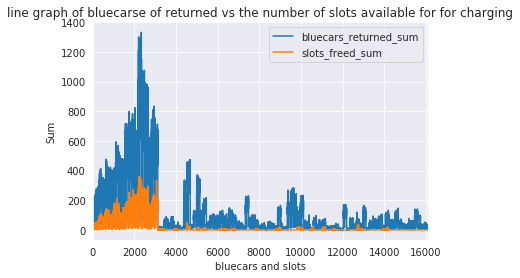

In [0]:
auto[['bluecars_returned_sum','slots_freed_sum']].plot()
plt.title('line graph of bluecarse of returned vs the number of slots available for for charging')
plt.xlabel('bluecars and slots')
plt.ylabel('Sum')
plt.show()

<Figure size 1008x1008 with 0 Axes>

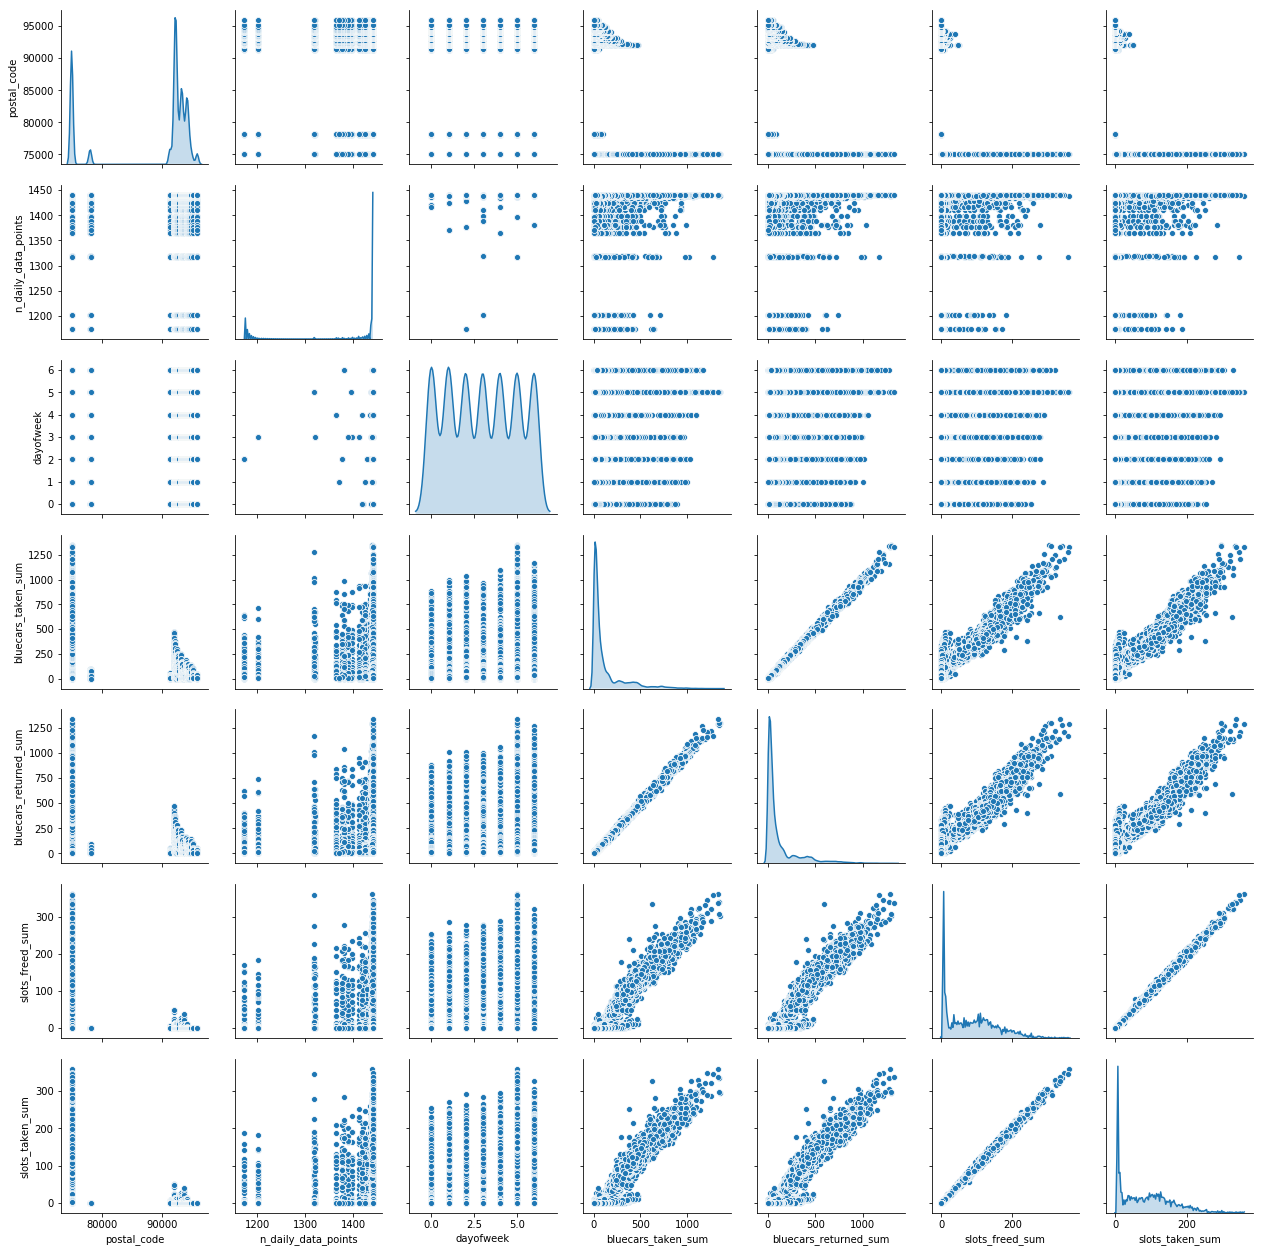

In [26]:
plt.figure(figsize=(14, 14))

sns.pairplot(auto, diag_kind='kde');
# Heat plot  helped  in visualizing the distribution of  variable, how they are skewed, either positive or negatively skewed,It also helped in checked how the variable were
# were spread from the mean.

In [76]:
auto1.head()

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
5,75001,1/6/2018,1437,5,weekend,187,185,38,35
6,75001,1/7/2018,1440,6,weekend,180,180,34,34
12,75001,1/13/2018,1440,5,weekend,224,223,38,38
13,75001,1/14/2018,1440,6,weekend,193,193,22,20
19,75001,1/20/2018,1439,5,weekend,217,217,41,39


### Scatter plot

Text(0, 0.5, 'bluecars returned sum')

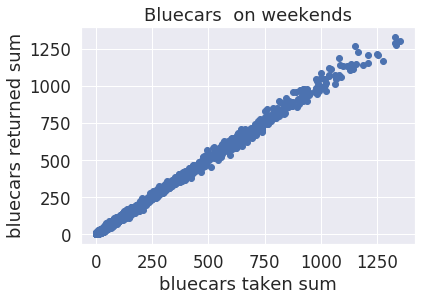

In [152]:
# create a figure and axis
fig, ax = plt.subplots()
colors={'bluecars_taken_sum':'r','bluecars_returned_sum':'b'}
#color= colors[auto1]
# scatter the bluecars taken  against the blucars returned
ax.scatter(auto1['bluecars_taken_sum'], auto1['bluecars_returned_sum'])

# set a title and labels

ax.set_title('Bluecars  on weekends')
ax.set_xlabel('bluecars taken sum')
ax.set_ylabel('bluecars returned sum')
# both bluecars taken and those returned they appear to have linear regression 
# Reason is beacuse the rate at which  bluecars were taken is almost  the same rate bluecars were  returned.

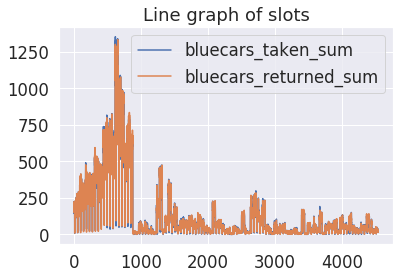

In [158]:
# get columns to plot
columns = auto1.columns.drop(['date','dayofweek','postal_code','slots_freed_sum',	'slots_taken_sum','n_daily_data_points','day_type'])

#create x data
x_data = range(0, auto1.shape[0])

# create figure and axis
fig, ax = plt.subplots()
# plot each column
for column in columns:
    ax.plot(x_data, auto1[column])
# set title and legend
ax.set_title('Line graph of slots')
ax.legend()


In [0]:
# create color dictionary

# create color dictionary
colors = {'bluecars_taken_sum':'r', 'bluecars_returned_sum':'g', 'slots_taken_sum':'b'}
# create a figure and axis
fig, ax = plt.subplots()
# plot each data-point
for i in range(len(auto['bluecars_taken_sum'])):
    ax.scatter(auto['bluecars_taken_sum'][i], auto['bluecars_returned_sum'][i],color=colors[auto['date'][i]])
# set a title and label
ax.set_title('autolib bluecars')
ax.set_xlabel('bluecars taken')
ax.set_ylabel('bluecars returned')

In [0]:
#Stacked bar plot with two-level group byPermalink

auto.groupby(['day_type','slots_taken_sum']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

Correlation

In [77]:
#Correlation
#Correlation is a statistical measure that describes the association between random variables. 
#In this section, will use pandas to calculate the correlation coefficient. 
#We will calculate the pearson correlation coefficient which is the most widely used correlation coefficient.

 #Determine the relationship between the repondents age in relation  households sizes 
# Calculating the pearson coefficient
p_coeff = auto1["bluecars_taken_sum"].corr(auto["bluecars_returned_sum"], method="pearson") 
print('correlation',p_coeff)

# Checking whether you have to define the pearson
coeff = auto1["bluecars_taken_sum"].corr(auto["slots_freed_sum"]) 
print('correlation',coeff)
# Correlation coefficients between -0.20 and 0.20 are generally considered weak, 
# A negative (inverse) correlation occurs when the correlation coefficient is less than 0 
# and indicates that both variables  are know to move in the opposite direction. 
#In both case, btween bluecars  taken, bluecars returned and slots available for feeding they all had a strong correlation, the hae a correlation of almost 1

correlation 0.9985777392530121
correlation 0.9538117561234175


In [78]:
#CAR.groupby(['ID','Bluecar counter'])['Bluecar counter'].sum().sort_values(ascending=False).head()


auto1.groupby(by='day_type').sum()

,postal_code,n_daily_data_points,dayofweek,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
day_type,,,,,,,
weekend,403216672,6514949,24979,686100,690365,122197,122475


In [87]:
auto1.groupby(['dayofweek','postal_code','bluecars_taken_sum'])[['bluecars_returned_sum']].sum().sort_values(by='dayofweek',ascending=False)

bluecars_returned_sum
dayofweek postal_code bluecars_taken_sum                       
6         95880       49                                     47
          92120       71                                     63
          92110       21                                     92
                      23                                     20
                      24                                     41
                      25                                     24
                      26                                     35
                      27                                     29
                      28                                     80
                      29                                     95
                      30                                     32
                      32                                     34
                      33                                     34
          92120       79                                     83
                      116                                   122
                      83                                     89
                      85                                    180
                      87                                    176
                      89                                     85
                      91                                    102
                      92                                     88
                      94                                    105
                      98                                    204
                      100                                   106
                      102                                   206
                      103                                   103
          92110       20                                     25
                      17                                     15
                      13                                     17
          92100       475                                   455
...                                                         ...
5         93150       4                                       4
                      5                                       6
          93110       62                                     54
                      53                                     99
          93100       170                                   160
          93110       52                                     47
          93100       178                                   178
                      182                                   185
                      184                                   190
                      187                                   188
                      194                                   199
                      197                                   187
                      198                                   190
                      201                                   185
                      204                                   187
                      216                                   212
                      228                                   233
                      245                                   231
          93110       1                                       2
                      30                                     25
                      33                                     35
                      37                                     33
                      42                                     39
                      44                                     34
                      45                                     89
                      48                                    130
                      49                                     39
                      50                                    142
                      51                                     84
          95880       18                                     21

[3513 row

In [146]:
# checking which  the number of blucars that were taken on Sutarday and sunday
auto1.groupby('dayofweek').bluecars_taken_sum.sum()


# Based on the results , most blues were taken  on sutardays than on sundays


dayofweek
5    353934
6    332166
Name: bluecars_taken_sum, dtype: int64

In [149]:

autod=auto1[auto1.dayofweek == '5']
autod.head
#print('Dataframe of bluecars taken and  returned on sutarday',autod)


#auto1=auto[auto.day_type  == 'weekend']

/usr/local/lib/python3.6/dist-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


<bound method NDFrame.head of Empty DataFrame
Columns: [postal_code, date, n_daily_data_points, dayofweek, day_type, bluecars_taken_sum, bluecars_returned_sum, slots_freed_sum, slots_taken_sum]
Index: []>

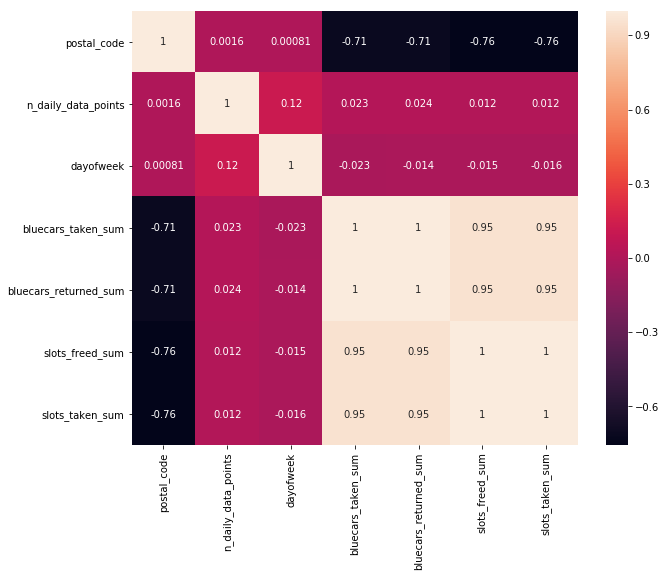

In [17]:
f, ax = plt.subplots(figsize=(10, 8))
corr = auto1.corr()
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values,
          annot = True)
#  variables with   correlation  more than 0.5 or -0.5 are highly correlated

# Multivariate Analysis: 

---

## Multiple Regression Analysis:Polynomial Regression

I choose Polynomial Regression because i am interested with the number of bluecars taken and returned in the same station. 
Postal code is the depended variable while  number of bluecars taken and the bluecar taken are the indenendent variables.

We are interested to create a model that is suitable for handling non-linearly separable data, we will need to use a polynomial regression. In this regression technique, the best fit line is not a straight line. It is rather a curve that fits into the data points. For a polynomial regression, the power of some independent variables is more than 1. For example, we can have something like:

Y = a_1X_1 + (a_2)²X_2 + (a_3)⁴X_3 ……. a_nX_n + b

We can have some variables have exponents, others without, and also select the exact exponent we want for each variable. However, selecting the exact exponent of each variable naturally requires some knowledge of how the data relates to the output.

In [0]:
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

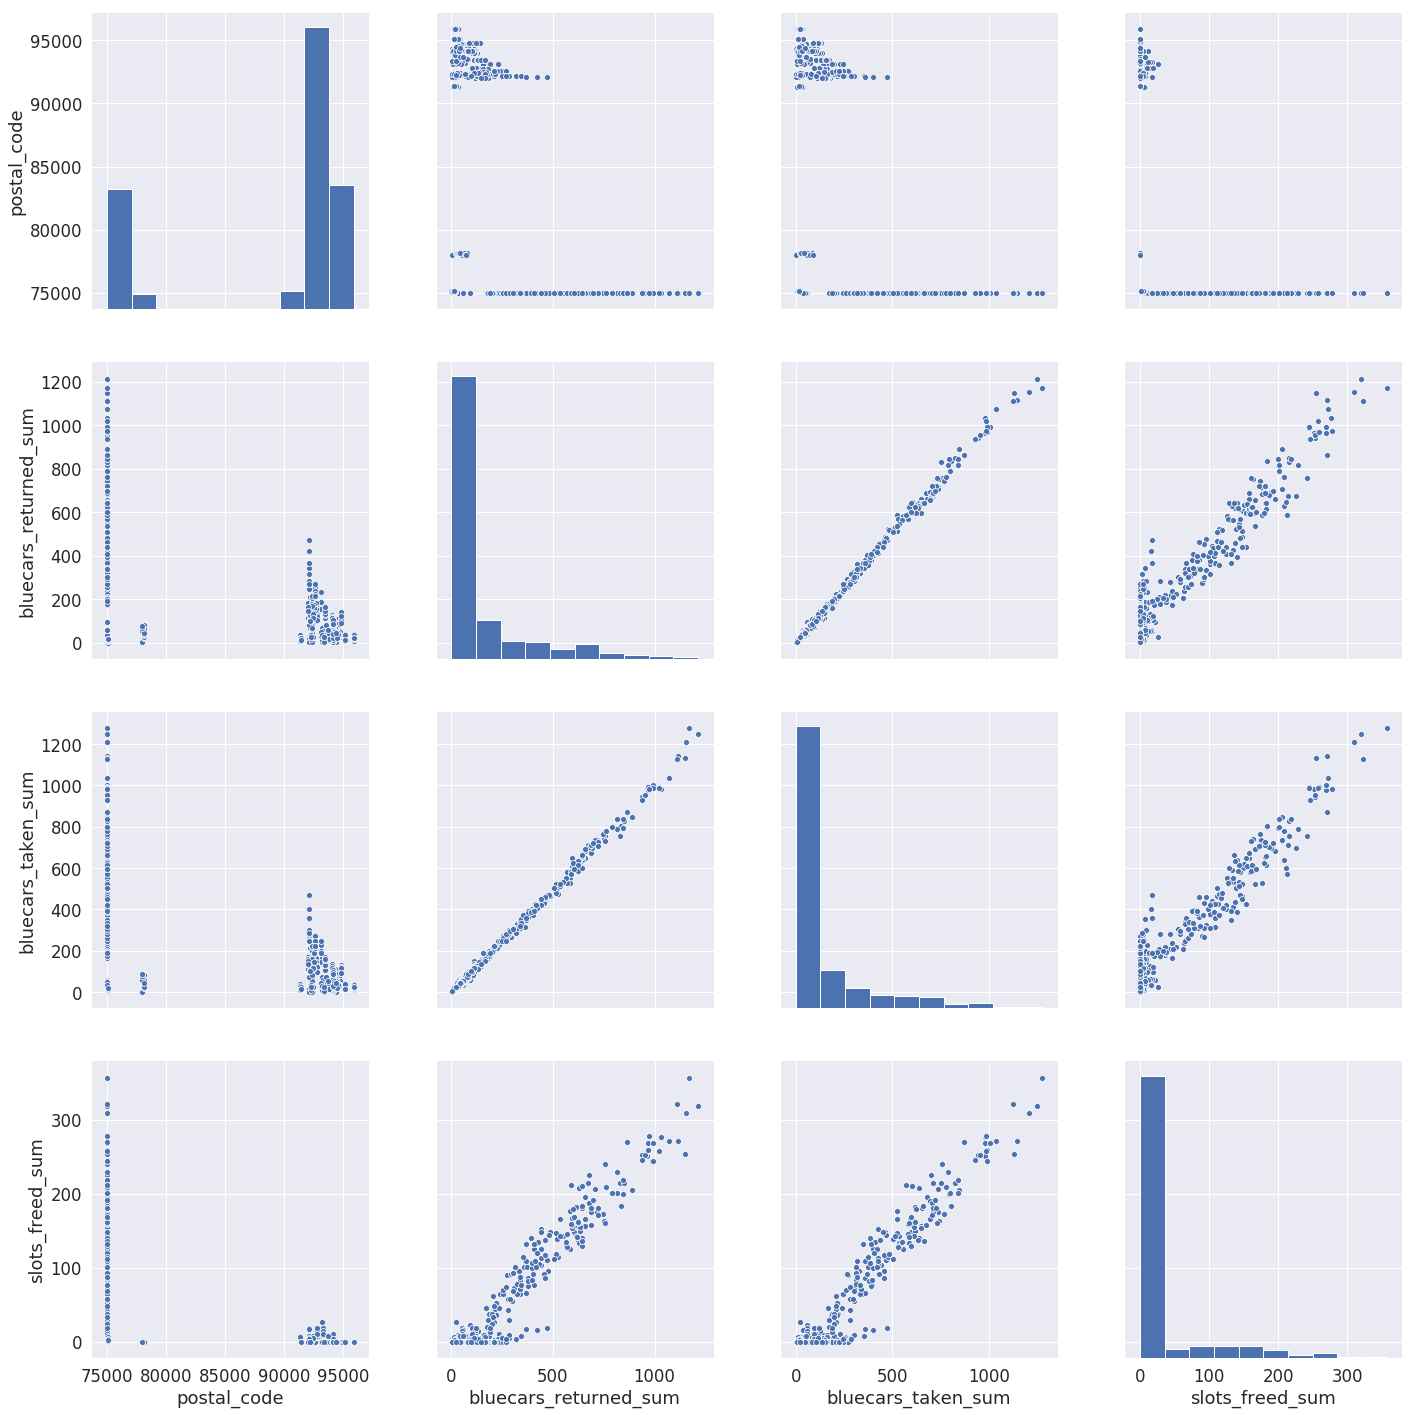

In [101]:
# Creating a pairplot
cols = ['postal_code','bluecars_returned_sum', 'bluecars_taken_sum','slots_freed_sum']
sns.pairplot(auto1_sample[cols], height=5)
plt.tight_layout()
plt.show()

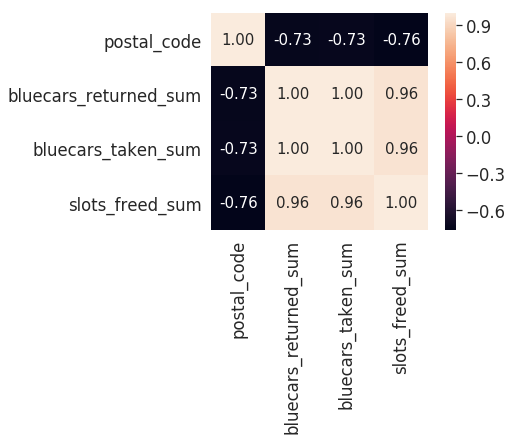

In [102]:
# Creating a correlation matrix
CM= np.corrcoef(auto1_sample[cols].values.T)

# Using the correlation matrix to create a heatmap as shown below
sns.set(font_scale=1.5)
hm = sns.heatmap(
    CM, cbar=True, annot=True, 
    square=True, fmt='.2f',
    annot_kws={'size': 15},
    yticklabels=cols,
    xticklabels=cols)
plt.show()
 # based on the annotations thatwe have we can conclusively say that there is  a high correlation between the variables plotted on heat map

In [0]:
#creating the  y and x axis of a regression.
# x axis has bluecartaken while y axis has postal code of where those blucars were taken
X = auto1_sample[['bluecars_taken_sum']].values
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]
y = auto1_sample['postal_code'].values

In [0]:
# Step 2: Creating the quadratic and cubic features
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)

X_cubic = cubic.fit_transform(X)

In [0]:
#Fitting the linear regression model, making predictions and calculating R-squared
regr = LinearRegression()
regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

In [0]:
#Fitting the quadratic model, making predictions, calculating R-squared
regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

In [0]:
#Fitting the cubic model, making predictions, calculating R-squared
regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))

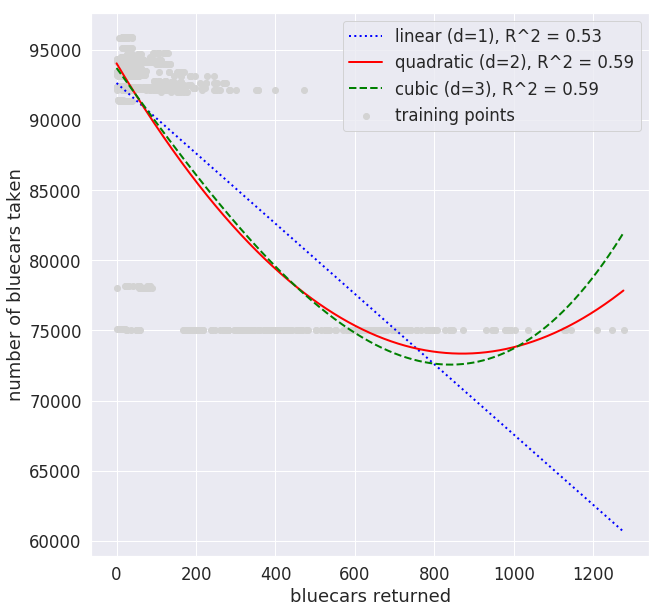

In [126]:
#Plotting the results
plt.figure(figsize=(10, 10))
plt.scatter(X, y, label='training points', color='lightgray')
plt.plot(
    X_fit, y_lin_fit,
    label=f'linear (d=1), R^2 = {linear_r2:.2f}',
    color='blue', lw=2, linestyle=':'
)
plt.plot(
    X_fit, y_quad_fit,
    label=f'quadratic (d=2), R^2 = {quadratic_r2:.2f}',
    color='red', lw=2, linestyle='-'
)
plt.plot(
    X_fit, y_cubic_fit,
    label=f'cubic (d=3), R^2 = {cubic_r2:.2f}',
    color='green', lw=2, linestyle='--'
)

plt.xlabel('bluecars returned')
plt.ylabel('number of bluecars taken')
plt.legend(loc='upper right')

y_cubic_fit
plt.show()

## Plotting the results of polynominal regression
 


*   As we can see from the resulting plot, the cubic fit captures the relationship 
between bluecars taken  and bluecars returned in all weekends than the linear and quadratic fit.
* However,if was to add  more and more polynomial features such as slots available for feeding  as well as slots_taken_sum it would increase
the complexity of a model and therefore increases the chance of overfitting . 
Thus, in practice it is always recommended to evaluate the performance of the model on a separate test dataset to estimate the generalization performance.

*   Now taht we have made our model we need to know whicg features (variables) were really affectin the number of bluecars taken in our postal code of interest which was  75015. 


  



In [27]:
auto.head()

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,18,20


In [134]:
auto1_sample.shape

(1000, 9)

Now that I have  my sample of  1000 variable ,I  calculate the  p-value from the sample.
Sinece my  sample is greater than 30 i shall use Z-TEST to calculate the P_value in oder for me to either Accept or reject my null hypothesis.
I  shall a use  a significance value of 5%

If the p-value is less than 5%, then the null hypothesis is rejected
 let us assume, the number of  bluecars taken from  postal code 75015 are 123 every weekend.
 Formula
# Z = (x – μ) / (σ / √n)
x=mean

μ= sample mean

σ=standard deviation

√n=square root of the numberof the samples



In [57]:
#Checking for the mean of bluecars in our sample
mean_z=auto1['bluecars_taken_sum'].mean()
print('The avearge number   of bluecars taken from postal code in the sample  taken are',mean_z)

The avearge number   of bluecars taken from postal code in the sample  taken are 151.09006826690157


In [20]:
# checking for the standard deviation of the sample
std=auto1['bluecars_taken_sum'].std()
print(' The std is',std)


 The std is 218.5656415891513


In [48]:
# calculating the Z value
signal=(125.92695-mean_z)
#√1000=31.62277660
noise=(std/31.62277660)
z_score=(signal/noise)
print('Z score value is ',z_score)
# since our  Z score  value is  a negative value it means that  my distribution curve  is LEFT TAIL

Z score value is  -3.6406804918102185


In [0]:
from scipy import stats
from scipy.stats import norm


In [50]:
p_value = 1 - stats.norm.cdf(z_score)
p_value
# after calculation of p value which is given as 1-significance level(0.05)
# I got 0.9998640407960675. This figure is greater than the significance level thus i will accept my null hypothesis.

0.9998640407960675

## Distribution

---

Now that we have gotten to know the  actual mean of  each postal code is 125.92695057506994. What would be the probably of choosing a postal code  whose mean is 125.92695057506994  if the probability of choosing  30 postal codes of 100 postal is 80%

In [143]:
# we use binomial distribution
from scipy.stats import binom
mean =30
binom.pmf(mean, 100, 0.2)
#plt.bar([binom.pmf(30, 100, 0.8)])


0.005189643239948643

## Follow up questions

---

### Did we have the right data?
* Since  I managed to justify  the claim, I would say the dataset  that was given for this research was appropriate.

### Do we need other data to answer our question?
* Since  I  managed to investigate the claim that was claimed , provison for another  dataset set would not be necessary

### Did we have the right question?
* No beacuse we weren't exactly told which   dataset they were so much interseted with. Either weekend or weekday and if they need one they would just provide a dataset for only weekend or weekday.

# Documentation

Since I was tasked to investigate a claim about the blue cars from the provided Autolib dataset, It meant that i had  to either accept the null hypothesis or fail tpo accept.
 
 What id on this dataset include:
# Data understand and  preparion

*  I loaded my dataset into a dataframe and then cleaned it by checking for outliers.Since the outliers had a meaning and would influence my analysis i decided to keep them.  
*   I also did  data tyding by dropping columns that would not contribute  to my analysis.


*   I performed pandas profiling report. The purpose of doing it it was to get a clear a clear picture of what my dataframe  really meant and also  get to understand features that would help me in my analysis

*   What followed is creating a dataframe that would only incorporate  in formation for weekends only(Sutarday:5,Sunday:6)

*   My new dataframe contained 4541 rows and 9 columns. SInce that was a big population to work with, I decided to chhose a sampling technique that would give a sample without biasness in the sample. I had two options from sampling technique;Sratified sampling  and random sampling.I wouldn't work with stratified sampling because it my dataframe only  featured information  for weekend only but if  i had both weekday and weekend then it would be a suitable a technique to use.

*   Random sampling technique is the method that I used for sampling. I randomly selected 1000 rows to work as sample.

# Univariate analysis

*   All that i did on this section are:
calculated the
*central tendacy.That is :Mean,Mode and median

* measure of disperity: range,Quantiles,skewness and kurtosis
and explain each section under comments
like for exple  in most numerical data that  were provided they were negatively skewed.
* visualization:Plotted histogram, a bar chart, a box plot, and a frequency table  which were all explained under each section they were plotted.


# Bivariate


*   It is in this section that i did comparison of two variables such checking the number of bluecars that were taken on sutarday in comparison to the number of bluecars thwere returned.Number of slots that were  where there. 

*   After the analysis part i was able to visualize my comparison using visualization technique with the help of matlibplot.Graphs that were plotted include:scatter plots, line charts to determine the relationship between variables,

* I was able to calculate  the correlation  of variables, This showed  how our variables were related to each other .Based on the correlation that i did  i managed to observe that almost all variable in the dataframe  were highly correlated to each other.I managed to plot the correlation using heatmap.
# Multivariate

* Since our dataset had many variables that would affect  the number bluecars that would be taken or returned at a given postal code,I did  polynomial regression since it would help  to tell how these variables would differ fron the linear regression. Some of the reasons or factors that would indlunce the number of blucars being taken or returned in any given area would be: Number of feeding slots,number slots taken as well as how that area was near to its customers. Day of the week would also affect the number of bluecars taken beacuse we observed that there were more bluecars on Sutarday than on a sunday.  

# Z-SCORE
 
* Since i needed  to proof my  null Hypothesis, performing a Z score was necessary. This would help in getting the p-value using the 

# * Z = (x – μ) / (σ / √n)
x=mean

μ= sample mean

σ=standard deviation

√n=square root of the numberof the samples


* After calculation i got Z score as -3.6406804918102185

* calculating the P_value= 1 - significance level)
p_value=0.9998.

* from the Z score vale that we got , it means that our curve was left tailed
* Since our P_value is greater that the significance level the it means we accept our Null hypothesis since there is enough eveidence to support the claim.

